# Laporan Proyek Machine Learning - Duta Kukuh Pribadi

## Project Overview

Perusahaan E-commerce seperti Amazon menggunakan berbagai sistem rekomendasi untuk memberikan saran kepada pelanggan. Saat ini, Amazon menggunakan penyaringan kolaboratif item-item, yang dapat menangani dataset besar dan menghasilkan sistem rekomendasi berkualitas tinggi secara real-time. dengan pertimbangan kemajuan dunia modern , kita dibanjiri dengan data, dan data ini memberikan kita informasi yang berguna. Namun, tidak mungkin bagi pengguna untuk mengekstrak informasi yang menarik bagi mereka dari data tersebut. Untuk membantu pengguna menemukan informasi tentang produk, sistem rekomendasi dikembangkan. Sistem ini adalah jenis sistem penyaringan informasi yang bertujuan untuk memprediksi "rating" atau preferensi yang diminati oleh pengguna.

**REFERENSI**

[Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering](https://dl.acm.org/doi/abs/10.1145/2872427.2883037)

## Business Understanding

Dengan melihat project overview , dapat dijelaskan business understanding sebagai berikut

### Problem Statements

Problem statement projek ini akan dijabarkan sebagai berikut

- Bagaimana kita bisa model sistem rekomendasi agar bisa membantu user dalam mencari produk yang benar ?
- Bagaimana kita bisa produk yang bisa menaikan engagement berdasarkan sistem rekomendasi ?

### Goals

Tujuan dari projek ini dijabarkan sebagaimana berikut

- Untuk mengetahui pembuatan sistem rekomendasi agar bisa membantu user dalam mencari produk yang benar
- Untuk mengetahui pembuatan produk yang bisa menaikan engagement berdasarkan sistem rekomendasi

Semua poin di atas harus diuraikan dengan jelas. Anda bebas menuliskan berapa pernyataan masalah dan juga goals yang diinginkan.

### Solution statements

Permasalahan dan tujuan di atas , bisa di selesaikan dengan hipotesa sebagai berikut

- Membuat Sistem rekomendasi menciptakan kesamaan antara pengguna dan item serta memanfaatkan kesamaan tersebut untuk memberikan rekomendasi berdasarkan tipe Rekomendasi sistem bernama Collaborative Filtering yang mana model Ini didasarkan pada asumsi bahwa orang menyukai hal-hal yang mirip dengan hal-hal lain yang mereka sukai, dan hal-hal yang disukai oleh orang lain dengan selera yang serupa.

## Data Understanding

Dataset ini adalah versi terbaru dari dataset ulasan Amazon yang dirilis pada tahun 2014. Seperti pada versi sebelumnya, dataset ini mencakup ulasan beberapa atribut, dengan pembaharuan sebagai berikut.

Lebih banyak ulasan:
Jumlah total ulasan adalah 233,1 juta (142,8 juta pada tahun 2014).
Ulasan yang lebih baru:
Data saat ini mencakup ulasan dalam rentang waktu Mei 1996 - Oktober 2018.

**REFERENSI DATASET**
[Amazon Product Review](http://jmcauley.ucsd.edu/data/amazon/).



Variabel-variabel pada Amazon Product Review dataset adalah sebagai berikut:

- **userId** : Every user identified with a unique id (First Column)

- **productId** : Every product identified with a unique id(Second Column)

- **Rating** : Rating of the corresponding product by the corresponding user(Third Column)

- **timestamp** : Time of the rating ( Fourth Column)



Mari kita mengimport library untuk inisialisasi project


In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import plotly.express as px
import warnings; warnings.simplefilter('ignore')
%matplotlib inline


for dirname, _, filenames in os.walk('./Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./Dataset\ratings_Electronics (1).csv


Di sini saya memuat dataset yang sudah saya unduh di local

In [40]:
electronics_data=pd.read_csv("./Dataset/ratings_Electronics (1).csv",names=['userId', 'productId','Rating','timestamp'])

Display data

In [41]:
# Display the data

electronics_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


Melihat shape atau jumlah data


In [42]:
#Shape of the data
electronics_data.shape

(7824482, 4)

terlihat bahwa data memiliki

- DataFrame electronics_data memiliki - 7.824.482 baris.
- DataFrame tersebut memiliki 4 kolom.

mengambil subset dataset

In [43]:
#Taking subset of the dataset
electronics_data=electronics_data.iloc[:1048576,0:]

Melihat tipe data di setiap atribut 

In [44]:
#Check the datatypes
electronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object


1. **userId (object)**: Kolom ini berisi data yang menunjukkan ID pengguna, disimpan sebagai tipe data `object`. Dalam Pandas, tipe `object` biasanya digunakan untuk teks atau string, meskipun juga dapat digunakan untuk tipe data campuran.

2. **productId (object)**: Kolom ini berisi data yang menunjukkan ID produk, juga disimpan sebagai tipe data `object`. Sama seperti `userId`, tipe ini digunakan untuk teks atau string.

3. **Rating (float64)**: Kolom ini berisi data yang menunjukkan penilaian atau rating yang diberikan pengguna terhadap produk, disimpan sebagai tipe data `float64`. Tipe `float64` adalah tipe data angka desimal dalam Pandas, yang memungkinkan penyimpanan nilai desimal dengan presisi tinggi.

4. **timestamp (int64)**: Kolom ini berisi data yang menunjukkan waktu (biasanya dalam format Unix timestamp) saat penilaian diberikan, disimpan sebagai tipe data `int64`. Tipe `int64` adalah tipe data bilangan bulat (integer) 64-bit dalam Pandas, yang memungkinkan penyimpanan angka yang sangat besar.



lalu kita mencari informasi jumlah data dalam tiap attribut 

In [45]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048576 non-null  object 
 1   productId  1048576 non-null  object 
 2   Rating     1048576 non-null  float64
 3   timestamp  1048576 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB



1. **<class 'pandas.core.frame.DataFrame'>**: Ini menunjukkan bahwa objek yang sedang dilihat adalah sebuah DataFrame, struktur data utama dalam Pandas untuk penyimpanan data berbentuk tabel.

2. **RangeIndex: 1048576 entries, 0 to 1048575**: DataFrame ini memiliki **1.048.576 baris**, dengan indeks mulai dari 0 hingga 1.048.575. `RangeIndex` adalah tipe indeks default yang digunakan oleh Pandas ketika DataFrame dibuat tanpa indeks khusus.

3. **Data columns (total 4 columns)**: DataFrame ini memiliki **4 kolom**.

4. **Kolom-kolom**:
   - **#**: Ini adalah nomor urut kolom dalam DataFrame.
   - **Column**: Nama dari masing-masing kolom.
   - **Non-Null Count**: Jumlah baris di setiap kolom yang **tidak bernilai `null` (kosong)**. Di sini, setiap kolom memiliki 1.048.576 nilai yang tidak `null`, berarti tidak ada nilai kosong di dalam DataFrame.
   - **Dtype**: Tipe data dari setiap kolom.

   Berikut detail untuk setiap kolom:
   - **userId (object)**: Kolom ini berisi ID pengguna sebagai teks atau string.
   - **productId (object)**: Kolom ini berisi ID produk sebagai teks atau string.
   - **Rating (float64)**: Kolom ini berisi penilaian pengguna sebagai angka desimal.
   - **timestamp (int64)**: Kolom ini berisi waktu (biasanya dalam format Unix timestamp) sebagai bilangan bulat.

Informasi ini memberikan gambaran umum tentang ukuran dan struktur DataFrame, termasuk jumlah baris dan kolom, tipe data di setiap kolom, dan apakah ada nilai yang hilang (`null`).

melihat statistikal data dari dataset dari column rating

In [46]:
#Five point summary 

electronics_data.describe()['Rating'].T

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

melihat nilai minimal dari rating yang diberikan dan nilai maksimalnya 

In [47]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


diketahui di sini nilai minimal 1, dan nilai rating maksimal adalah 5

### Handling Missing Values

disini saya melihat data yang bernilai null

In [48]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


terlihat bahwa tidak ada null value dalam  tiap columns

### Visualisasi Data Columns Rating 
disini kita nge cek distribusi rating 

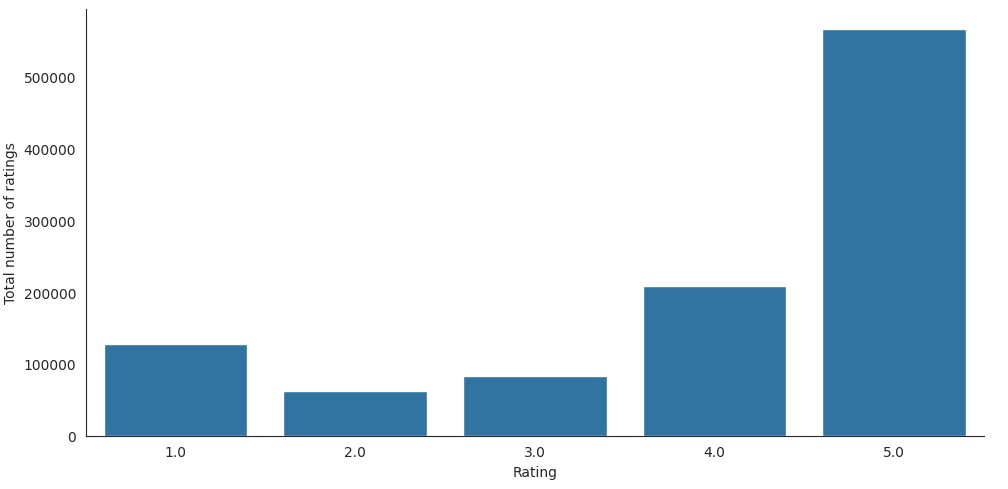

In [49]:
# Membuat plot distribusi rating
with sns.axes_style('white'):
    g = sns.catplot(x="Rating", data=electronics_data, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

kebanyakan user menilai 5 pada jumlah melebihi 500K

### Unique Users and products

melihat distribusi unique user dan produknya

In [50]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.userId)))
print("Total No of products  :", len(np.unique(electronics_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 1048576
Total No of Users   : 786330
Total No of products  : 61894


### Dropping the TimeStamp Column
disini saya mengbuang column timestamp

In [51]:
#Dropping the Timestamp column

electronics_data.drop(['timestamp'], axis=1,inplace=True)

menamilkan head dari `electronics_data`

In [52]:
electronics_data.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


terlihat disini timestamp dibuang

### Analyzing the rating

In [53]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

diisi terlihat ada user dengan rating atau ulasan terbanyak sebanyak 400 lebih ulasan

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'Jumlah Produk Dirating')

Text(0.5, 1.0, 'Top 10 Pengguna dengan Jumlah Rating Terbanyak')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A5JLAU2ARJ0BO'),
  Text(1, 0, 'A231WM2Z2JL0U3'),
  Text(2, 0, 'A25HBO5V8S8SEA'),
  Text(3, 0, 'A6FIAB28IS79'),
  Text(4, 0, 'AT6CZDCP4TRGA'),
  Text(5, 0, 'AKT8TGIT6VVZ5'),
  Text(6, 0, 'A11D1KHM7DVOQK'),
  Text(7, 0, 'A2B7BUH8834Y6M'),
  Text(8, 0, 'A3OXHLG6DIBRW8'),
  Text(9, 0, 'A203OCQQ12MAVT')])

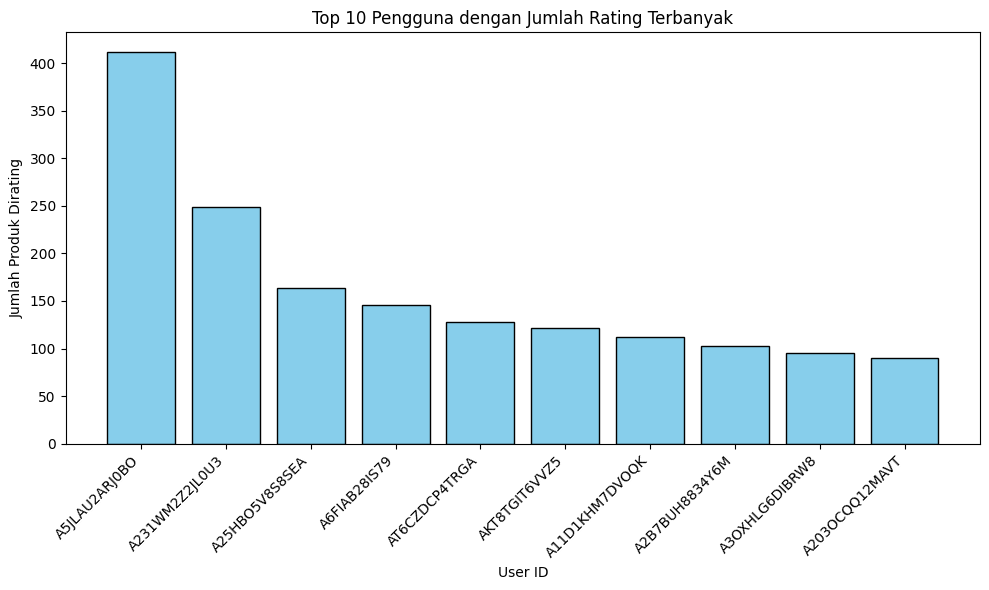

In [54]:
# Mengambil 10 pengguna dengan jumlah rating terbanyak
top_users = no_of_rated_products_per_user.head(10)

# Membuat bar diagram
plt.figure(figsize=(10, 6))
plt.bar(top_users.index, top_users.values, color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Jumlah Produk Dirating')
plt.title('Top 10 Pengguna dengan Jumlah Rating Terbanyak')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan bar diagram
plt.show()

disini terlihat distribusi dari rating yang diberikan ke masing masing user ID, terlihat bahwa A5JLAU2ARJ0BO memiliki rating paling banyak

melihat data statistical dari rating per user

In [55]:
no_of_rated_products_per_user.describe()

count    786330.000000
mean          1.333506
std           1.385612
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         412.000000
Name: Rating, dtype: float64

menghitung quantile dari distribusi jumlah produk yang telah dinilai oleh setiap pengguna.

In [56]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

<Axes: title={'center': 'Quantiles and their Values'}>

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

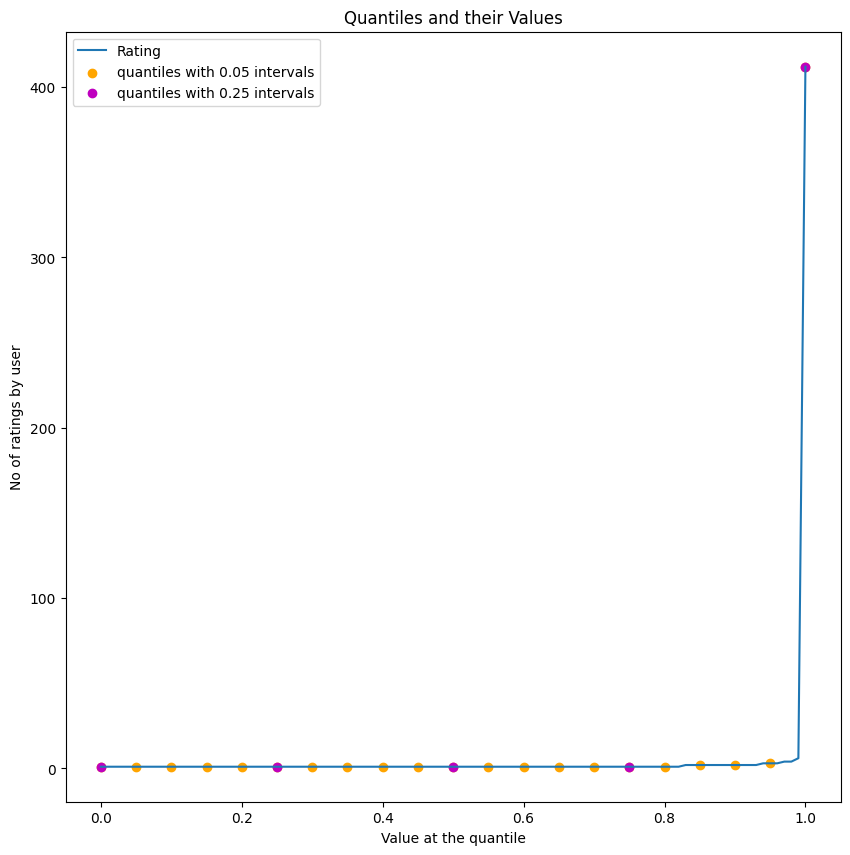

In [57]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

terlihat dari quantile 1 yang melebihi dari 400 rating user

Grafik ini menunjukkan bahwa distribusi rating pengguna sangat tidak merata. Sebagian kecil pengguna memberikan banyak sekali rating (yang terlihat dari lompatan curam di akhir grafik), sementara sebagian besar pengguna memberikan rating dalam jumlah kecil.








In [58]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 38



dari understanding data di atas, saya membuat variable baru dengan  memuat data user yang memberikan rating lebih dari 50 untuk selanjutnya dibuat dalam modelling

In [59]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)
new_df.head()

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0


lalu saya visualisasikan jumlah rating per **produk**

Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[Text(-500.0, 0, ''),
 Text(0.0, 0, ''),
 Text(500.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1500.0, 0, ''),
 Text(2000.0, 0, ''),
 Text(2500.0, 0, ''),
 Text(3000.0, 0, ''),
 Text(3500.0, 0, ''),
 Text(4000.0, 0, ''),
 Text(4500.0, 0, '')]

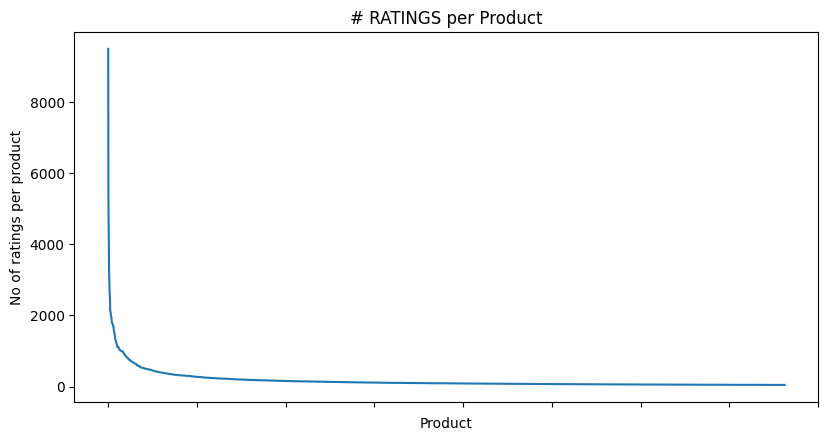

In [60]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

menampilkan rata rata nilai ulasan dari dataframe baru

In [61]:
#Average rating of the product 

new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

lalu saya urutkan secara ascending 

In [62]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B000I1X3W8    4.869565
Name: Rating, dtype: float64

disini beberapa produk memiliki rata rata rating yang tinggi , sebanyak 5 rating

menampilkan total rating per tiap produk

In [63]:
#Total no of rating for product

new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
Name: Rating, dtype: int64

selanjutnya saya membuat sebuah DataFrame bernama `ratings_mean_count` yang berisi informasi rata-rata rating dan jumlah rating untuk setiap produk berdasarkan `productId`. Langkah pertama, `new_df.groupby('productId')['Rating'].mean()` menghitung rata-rata rating untuk setiap produk dan menyimpannya sebagai kolom `Rating` dalam DataFrame. Selanjutnya, `new_df.groupby('productId')['Rating'].count()` menghitung jumlah rating yang diterima oleh setiap produk dan menyimpannya sebagai kolom baru bernama `rating_counts` di dalam DataFrame yang sama. Hasil akhirnya adalah DataFrame `ratings_mean_count` yang menggabungkan rata-rata rating dan jumlah rating untuk setiap produk, yang kemudian ditampilkan menggunakan `head()` untuk melihat beberapa baris pertama.

In [64]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


visualisasi distribusi variable `ratings_mean_count`

<Figure size 800x600 with 0 Axes>

<Axes: >

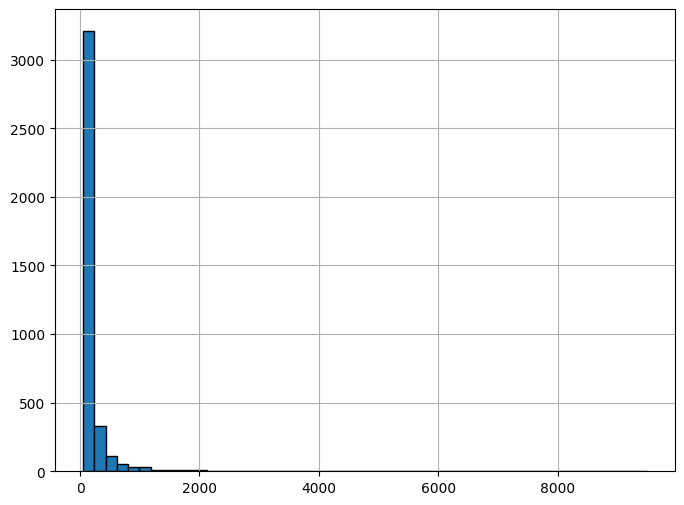

In [65]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

melihat persebaran banyaknya nilai rating dari skala 1 sampai 5

<Figure size 800x600 with 0 Axes>

<Axes: >

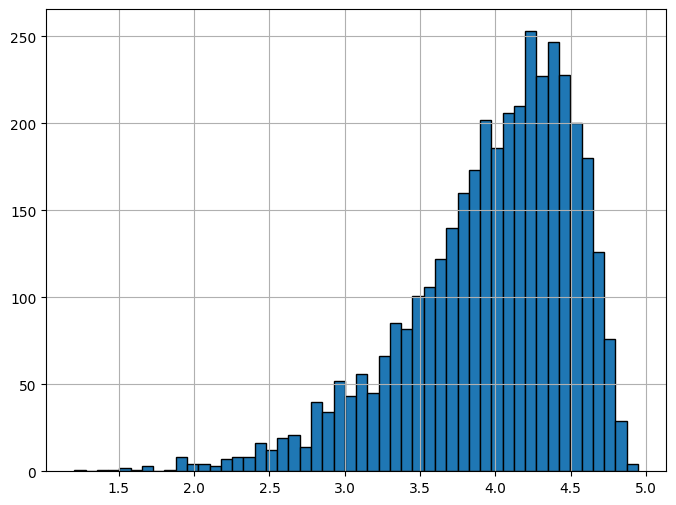

In [66]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

menggunakan `jointplot` agar tahu persebaran lebih presisi

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

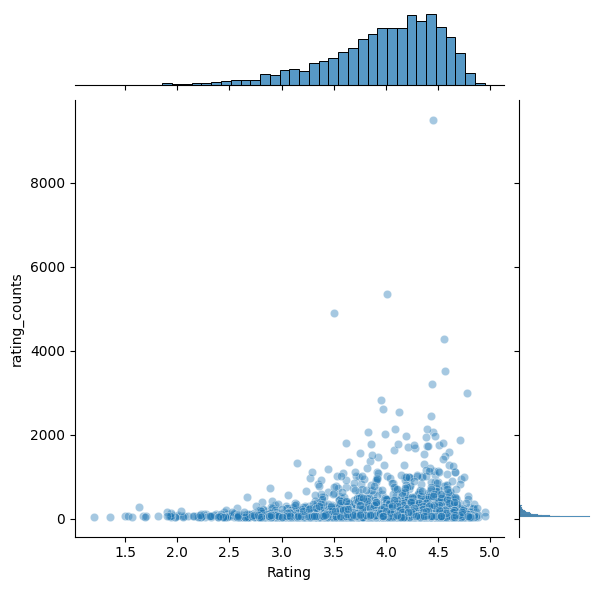

In [67]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

melihat banyaknya rating per produk

<Axes: xlabel='productId'>

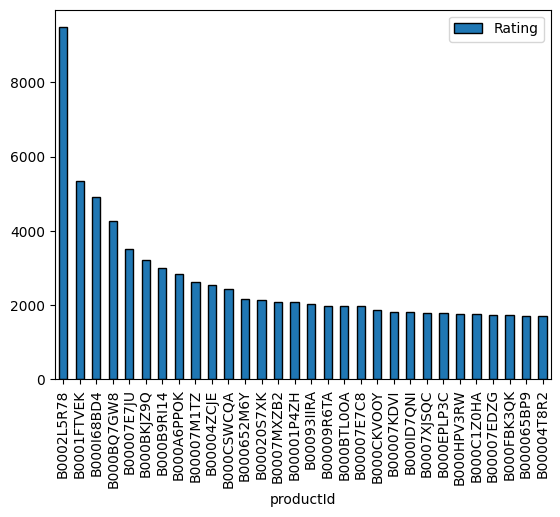

In [68]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

setelah mengetahui karakteristik data yang diambil, maka saya langsung ke tahap data preparation

## Data Preparation

In [69]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

### Reading and Splitting Dataset

disini mencoba untuk ngeload dataframe baru hasil dari modifikasi di dataset understandingnya 

In [70]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

lalu akan displit datasetnya di sini menjadi `trainset` dan `testset`

In [71]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

## Modeling

merujuk pada artikel 

[Adaptive KNN-Based Extended Collaborative Filtering Recommendation Services](https://www.mdpi.com/2504-2289/7/2/106#:~:text=The%20KNN%2Dbased%20collaborative%20filtering%20algorithm%20is%20a%20type%20of,users%20to%20the%20target%20user.)

saya menggunakan model KNN karena efektif dalam menggenerasi Top-N recommendations

In [72]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


## Evaluation

saya menjalankan model yang sudah di train ke testset

In [73]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [74]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3436


1.343641161111319

Nilai RMSE sebesar 1.343641161111319 memberi indikasi tentang seberapa baik model dalam memprediksi rating. Untuk menganalisis nilai ini, kita perlu mempertimbangkan beberapa aspek:

1. **Skala Rating**
   - Jika skala rating adalah dari 1 hingga 5 (seperti pada kebanyakan sistem rekomendasi), RMSE sekitar 1.34 menunjukkan bahwa rata-rata kesalahan prediksi model sekitar 1.34 unit dari nilai sebenarnya. Ini berarti prediksi model sering kali meleset lebih dari satu poin pada skala rating.

2. **Perbandingan dengan Baseline**
   - Bandingkan nilai RMSE ini dengan baseline model, seperti model yang memprediksi rating rata-rata untuk semua item atau pengguna. Jika RMSE jauh lebih rendah daripada baseline, ini adalah indikasi positif bahwa model menangkap pola dalam data lebih baik daripada model sederhana.

3. **Implementasi Model**
   - Dalam beberapa aplikasi, RMSE sekitar 1.34 mungkin dianggap cukup baik, terutama jika data memiliki banyak noise atau jika preferensi pengguna sangat beragam. Namun, dalam aplikasi yang memerlukan prediksi yang sangat akurat (misalnya, sistem rekomendasi kritis), mungkin ingin mencoba menurunkan RMSE lebih jauh.


4. **Interpretasi Keseluruhan**
   - Secara keseluruhan, RMSE sebesar 1.34 adalah indikasi bahwa model cukup baik, tetapi mungkin ada ruang untuk perbaikan tergantung pada tujuan dan kebutuhan aplikasi Anda. Jika dibandingkan dengan model baseline dan model lain, nilai ini dapat memberikan lebih banyak konteks apakah model memadai atau memerlukan perbaikan lebih lanjut.

In [75]:
from surprise import accuracy

# Get MAE
print("Item-based Model : Test Set")
accuracy.mae(test_pred, verbose=True)

Item-based Model : Test Set
MAE:  1.0505


1.0504772827976332

Nilai MAE (Mean Absolute Error) sebesar 1.0505 memberikan indikasi tentang rata-rata kesalahan absolut antara prediksi model dan nilai sebenarnya. Mari kita analisis lebih lanjut:

1. **Skala Rating**
   - Jika skala rating yang gunakan adalah dari 1 hingga 5, maka nilai MAE sebesar 1.05 menunjukkan bahwa, secara rata-rata, prediksi model meleset sekitar 1.05 unit dari nilai sebenarnya. Ini berarti bahwa prediksi model biasanya berada dalam jarak sekitar satu poin dari rating aktual.

2. **Perbandingan dengan RMSE**
   - MAE lebih mudah diinterpretasikan daripada RMSE karena tidak memberikan penalti lebih besar untuk kesalahan yang besar. Dengan MAE sebesar 1.05 dan RMSE sebesar 1.34, dapat dikatakan bahwa meskipun ada beberapa kesalahan besar yang memengaruhi RMSE, rata-rata kesalahan absolut tetap berada di sekitar 1.05. Ini menunjukkan bahwa kebanyakan prediksi model berada dalam jarak yang cukup konsisten dari nilai sebenarnya, namun ada beberapa outlier atau kesalahan besar yang meningkatkan RMSE.

3. **Konteks Aplikasi**
   - Dalam konteks sistem rekomendasi, MAE sebesar 1.05 pada skala 1 hingga 5 berarti prediksi masih bisa ditingkatkan. Idealnya, menginginkan MAE yang mendekati 0, yang menunjukkan prediksi yang sangat dekat dengan rating sebenarnya. Namun, nilai MAE ini tidak terlalu buruk, terutama jika data mengandung banyak noise atau jika pengguna memiliki preferensi yang sangat beragam.

4. **Interpretasi Keseluruhan**
   - MAE sebesar 1.05 menunjukkan bahwa model memiliki kesalahan prediksi yang cukup signifikan, tetapi tidak ekstrem. Ada ruang untuk perbaikan, terutama jika akurasi prediksi sangat penting dalam konteks aplikasi Anda. Bandingkan dengan baseline atau model lain yang coba untuk menentukan apakah model ini sudah cukup baik atau perlu ditingkatkan lebih lanjut.

In [76]:
from surprise.model_selection import cross_validate

# Perform cross-validation
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3397  1.3442  1.3473  1.3381  1.3370  1.3413  0.0039  
MAE (testset)     1.0447  1.0494  1.0514  1.0450  1.0439  1.0469  0.0030  
Fit time          2.89    2.80    3.41    3.11    3.34    3.11    0.24    
Test time         1.29    0.70    0.76    0.70    0.

dan berikut adalah grafik dari rmse dan mae

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Comparison of RMSE and MAE')

Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Error')

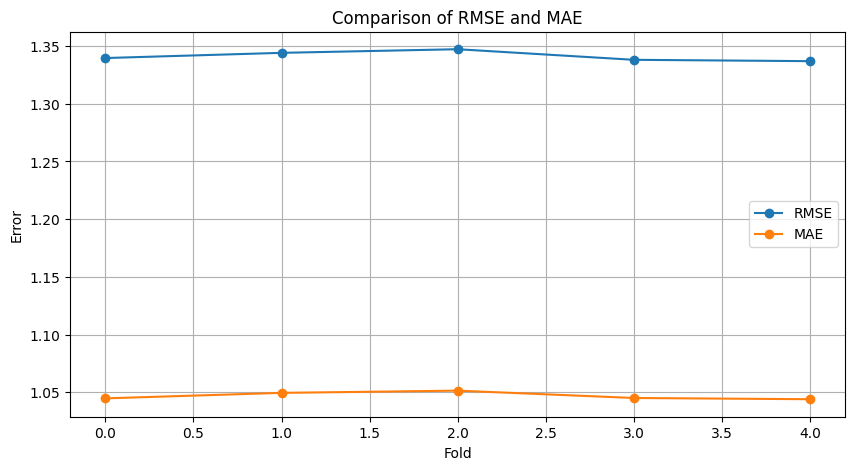

In [77]:
# Ambil nilai RMSE dan MAE dari hasil cross-validation
rmse_cv = results['test_rmse']
mae_cv = results['test_mae']

# Plot hasil evaluasi
plt.figure(figsize=(10, 5))

# Plot RMSE
plt.plot(rmse_cv, label='RMSE', marker='o')

# Plot MAE
plt.plot(mae_cv, label='MAE', marker='o')

plt.title('Comparison of RMSE and MAE')
plt.xlabel('Fold')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Analisis hasil cross-validation ini memberikan gambaran tentang performa model di berbagai lipatan (fold) dari data. Mari kita telaah setiap metrik yang diberikan:

1. **RMSE (Root Mean Square Error)**
   - **Fold Values**: Nilai RMSE pada setiap lipatan berkisar antara 1.3371 hingga 1.3453. Ini menunjukkan bahwa performa model cukup konsisten di berbagai subset data.
   - **Mean**: Rata-rata RMSE sebesar 1.3417 menunjukkan bahwa, secara keseluruhan, kesalahan kuadrat rata-rata model berada di sekitar 1.34 unit dari nilai sebenarnya. Ini konsisten dengan analisis sebelumnya, di mana RMSE sekitar 1.34 berarti model cenderung meleset sekitar 1.34 unit pada skala rating.
   - **Standard Deviation (Std)**: Nilai standar deviasi sebesar 0.0036 sangat kecil, menunjukkan bahwa performa model sangat stabil di berbagai lipatan. Model tidak terlalu sensitif terhadap perubahan data, yang merupakan pertanda baik.

2. **MAE (Mean Absolute Error)**
   - **Fold Values**: Nilai MAE pada setiap lipatan berkisar antara 1.0438 hingga 1.0504, menunjukkan bahwa kesalahan absolut rata-rata cukup konsisten di seluruh lipatan.
   - **Mean**: Rata-rata MAE sebesar 1.0470 berarti bahwa, secara rata-rata, prediksi model meleset sekitar 1.05 unit dari nilai sebenarnya. Ini sejalan dengan analisis sebelumnya bahwa MAE ini mengindikasikan kesalahan prediksi yang moderat tetapi tidak ekstrem.
   - **Standard Deviation (Std)**: Standar deviasi sebesar 0.0027 juga sangat kecil, menegaskan bahwa kesalahan absolut rata-rata stabil di seluruh subset data yang diuji.

3. **Fit Time**
   - **Fold Values**: Waktu pelatihan (fit time) berkisar antara 2.94 detik hingga 3.72 detik per lipatan. Variasi ini mungkin disebabkan oleh perbedaan beban komputasi atau kinerja sistem pada saat pelatihan.
   - **Mean**: Rata-rata waktu pelatihan sebesar 3.28 detik menunjukkan bahwa model membutuhkan waktu yang cukup singkat untuk dilatih pada setiap subset data.
   - **Standard Deviation (Std)**: Standar deviasi sebesar 0.29 detik menunjukkan adanya variasi kecil dalam waktu pelatihan, tetapi ini tidak signifikan dan masih dalam batas yang dapat diterima.

4. **Test Time**
   - **Fold Values**: Waktu pengujian (test time) berkisar antara 0.72 detik hingga 0.80 detik per lipatan, yang menunjukkan konsistensi dalam kecepatan evaluasi model.
   - **Mean**: Rata-rata waktu pengujian sebesar 0.75 detik menunjukkan bahwa model memprediksi dengan cepat pada subset data uji.
   - **Standard Deviation (Std)**: Standar deviasi sebesar 0.03 detik sangat kecil, menunjukkan waktu pengujian yang sangat stabil dan konsisten di berbagai lipatan.

**Kesimpulan Cross Validation**
- **Konsistensi**: Nilai RMSE dan MAE yang sangat konsisten di seluruh lipatan menunjukkan bahwa model cukup stabil dan tidak terlalu dipengaruhi oleh variasi data. Standar deviasi yang rendah memperkuat kepercayaan dalam hasil model.
- **Performansi**: Meskipun nilai RMSE dan MAE mengindikasikan bahwa model memiliki kesalahan prediksi yang moderat, konsistensi model di berbagai lipatan adalah pertanda positif. bisa mencoba meningkatkan performa model dengan tuning hyperparameter lebih lanjut atau dengan mencoba metode lain.
- **Efisiensi**: Waktu pelatihan dan pengujian yang singkat dan konsisten menunjukkan bahwa model ini efisien dalam hal komputasi, yang penting untuk aplikasi yang membutuhkan respons cepat.

Secara keseluruhan, model ini tampaknya stabil dan efisien, meskipun mungkin masih ada ruang untuk perbaikan dalam hal akurasi prediksi.

## Kesimpulan 

Untuk menjawab apakah model yang buat telah memenuhi tujuan dalam problem statement proyek, mari kita tinjau kedua poin dari problem statement dan hubungkan dengan hasil cross-validation yang peroleh:

1. **Membantu User Mencari Produk yang Benar**
   - **Analisis RMSE dan MAE**: Hasil cross-validation menunjukkan bahwa model memiliki RMSE sekitar 1.3417 dan MAE sekitar 1.0470. Ini menunjukkan bahwa model memiliki kesalahan prediksi rata-rata sekitar 1 poin pada skala rating 1 hingga 5. Jika tujuan utama adalah membantu pengguna menemukan produk yang benar, maka akurasi ini mungkin sudah cukup baik, tetapi bergantung pada konteks spesifik:
     - Jika pengguna cenderung puas dengan prediksi yang akurat dalam selisih sekitar 1 poin, model ini mungkin sudah cukup memadai.
     - Namun, jika aplikasi memerlukan prediksi yang sangat akurat untuk meningkatkan pengalaman pengguna, mungkin perlu mengoptimalkan model lebih lanjut untuk menurunkan nilai RMSE dan MAE.

2. **Meningkatkan Engagement Berdasarkan Rekomendasi**
   - **Kaitan dengan Engagement**: Meningkatkan engagement melalui sistem rekomendasi tidak hanya bergantung pada akurasi prediksi, tetapi juga pada relevansi dan personalisasi rekomendasi. RMSE dan MAE yang rendah membantu
   
**Penutup**
- **Kualitas Rekomendasi**: Berdasarkan nilai RMSE dan MAE, model cukup baik dalam memberikan rekomendasi yang akurat, tetapi mungkin ada ruang untuk perbaikan.


Jika engagement dan kepuasan pengguna adalah kunci keberhasilan proyek ini, pertimbangan tambahan ini akan sangat penting untuk memastikan bahwa model memenuhi tujuan secara menyeluruh.

### Referensi

[Nguyen, Luong Vuong, Quoc-Trinh Vo, and Tri-Hai Nguyen. "Adaptive knn-based extended collaborative filtering recommendation services." Big Data and Cognitive Computing 7.2 (2023): 106.](https://www.mdpi.com/2504-2289/7/2/106#:~:text=The%20KNN%2Dbased%20collaborative%20filtering%20algorithm%20is%20a%20type%20of,users%20to%20the%20target%20user.)
